In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [18]:
crypto_data = Path('crypto_data.csv')
crypto_df = pd.read_csv(crypto_data)
crypto_df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [19]:
#discard currencies not being traded
crypto_traded=crypto_df[crypto_df["IsTrading"]==True]
crypto_traded =crypto_traded.rename(columns = {"Unnamed: 0": "Symbol"})
crypto_traded

,Symbol,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [20]:
#drop IsTrading column
crypto_df= crypto_traded.drop(columns=["IsTrading"])
crypto_df

,Symbol,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [21]:
#remove rows with atleast one null value
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column Symbol has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [22]:
crypto_nonull=crypto_df.dropna()
crypto_nonull

,Symbol,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [23]:
#filter for cryptos with above 0 mined
crypto_mined_df=crypto_nonull[crypto_nonull["TotalCoinsMined"] > 0]
crypto_mined_df

,Symbol,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [24]:
#crypto symbol removed and turned to index
indexed_df=crypto_mined_df.drop(columns=["CoinName"])
crypto_index=indexed_df.set_index("Symbol")
crypto_index

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Symbol,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [25]:
#convert text values to numerical data
dummies= pd.get_dummies(crypto_index, columns=["Algorithm","ProofType"])
dummies

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
Symbol,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
#standardize dataset
crypto_scale=StandardScaler().fit_transform(dummies)

In [27]:
#dimensionality reduction with PCA with 90% variance
pca = PCA(n_components = 0.90)
crypto_pca= pca.fit_transform(crypto_scale)
crypto_pca

array([[-3.35098808e-01,  1.03218907e+00, -5.90713438e-01, ...,
         4.89609055e-15, -4.88368187e-15,  6.98047254e-17],
       [-3.18433948e-01,  1.03233143e+00, -5.91125551e-01, ...,
         5.02572983e-15, -4.68959529e-15,  1.06466280e-15],
       [ 2.30546811e+00,  1.65638302e+00, -6.83616670e-01, ...,
         7.92502380e-14,  1.79662556e-14, -2.82150102e-15],
       ...,
       [ 3.24348535e-01, -2.31230764e+00,  4.21515366e-01, ...,
        -2.09093540e-16,  3.89074500e-14, -1.37146665e-13],
       [-1.49363652e-01, -2.04933553e+00,  4.12968257e-01, ...,
         1.62421864e-15, -3.22428176e-15,  4.84250967e-15],
       [-2.89957500e-01,  8.21194511e-01, -2.76326847e-01, ...,
         4.65245536e-15, -3.26496511e-15, -1.85390895e-15]])

In [28]:
# further reduce the dataset dimensions with t-SNE
tsne= TSNE(learning_rate = 35)
tsne_array= tsne.fit_transform(crypto_pca)
tsne_array

array([[  8.039169 ,  13.020987 ],
       [ 14.124256 ,  16.31087  ],
       [ 18.538424 ,  23.28589  ],
       ...,
       [ 16.155512 , -17.732697 ],
       [  7.0016103, -22.074415 ],
       [-10.048053 ,  -2.9702597]], dtype=float32)

In [29]:
x=tsne_array[:,0]
y=tsne_array[:,1]

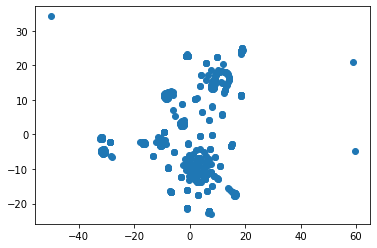

In [30]:
plt.scatter(x,y)
plt.show()

In [31]:
#cluster analysis with k-means
inertia=[]
k= list(range(1,11))

for i in k:
    kmeans=KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dummies)
    inertia.append(kmeans.inertia_)
    
    
elbow_graph= {"k":k, "inertia":inertia}
elbow_df = pd.DataFrame(elbow_graph)
elbow_df

C:\Users\Nate\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,k,inertia
0,1,3.542739e+24
1,2,1.061346e+24
2,3,6.224534e+23
3,4,2.450600e+23
4,5,1.284591e+23
5,6,7.859803e+22
6,7,5.562825e+22
7,8,4.056900e+22
8,9,2.972836e+22
9,10,2.174527e+22


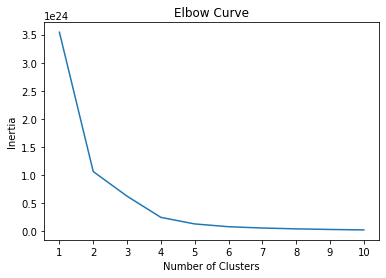

In [32]:
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

Based off of the elbow curve analysis these cryptos can be clustered into 4 groups.